### Build an MLP for ECG Signal Classification (5 classes)  - Keras
This is the implementation of an MLP for classifying the ECG signals. <br>
Your task is to design new DNNs for ECG signal classification <br>
You can use this file as a template

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adamax
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import pandas as pd

### Load the data

In [2]:
X=pd.read_csv('ECG_dataX.csv')
Y=pd.read_csv('ECG_dataY.csv')

In [3]:
#convert dataframe to numpy array
X=X.values
X.shape

(3841, 187)

In [4]:
#convert dataframe to numpy array
Y=Y.values
Y.shape

(3841, 1)

In [5]:
#reshape Y into a 1D array
Y=Y.reshape(-1)
Y.shape

(3841,)

(array([800.,   0., 800.,   0.,   0., 800.,   0., 641.,   0., 800.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

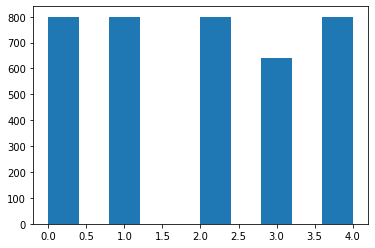

In [6]:
plt.hist(Y)

In [7]:
fs=125  # sampling frequency
Ts=1/fs # sampling interval
N=187 # the number of timepoints
Duration=N*Ts # duration of a signal
t=np.linspace(0, Duration-Ts, N) # array of timepoints

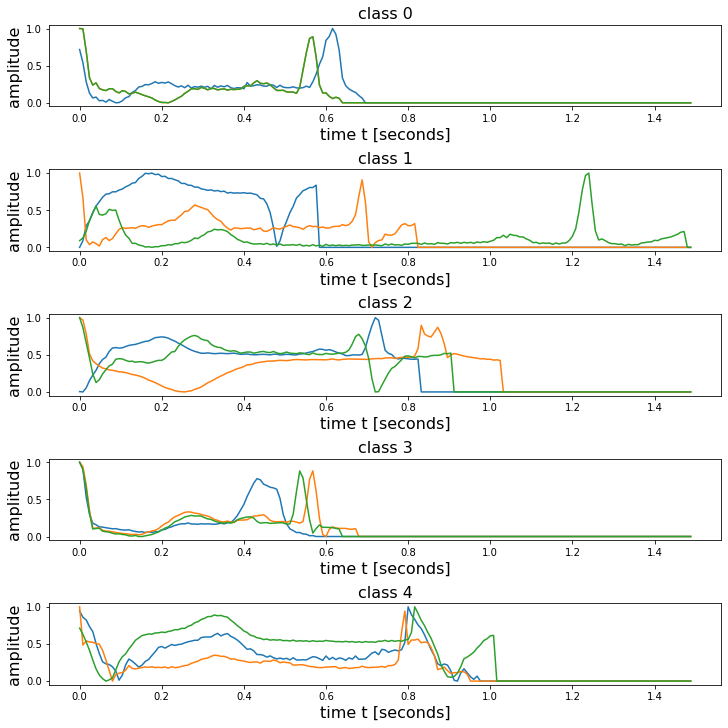

In [8]:
fig, ax = plt.subplots(5,1,constrained_layout=True, figsize=(10,10))
for c in range(0, 5):   
    for n in range(0, 3):
        idx=np.random.randint(0,10)
        ax[c].plot(t, X[Y==c][idx])        
        ax[c].set_xlabel('time t [seconds]', fontsize=16)
        ax[c].set_ylabel('amplitude', fontsize=16)
    ax[c].set_title('class '+str(c), fontsize=16)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
#note: add a channel axis to the data if the network is CNN: see the examples presented in class

### Define the MLP model  (Replace this with your network and rename the file)

In [11]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(187,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adamax(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               48128     
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 115,205
Trainable params: 115,205
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adamax.py:95: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)


In [12]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]
epoch_save=-1

### Train the model

In [13]:
for epoch in range(epoch_save+1, 100): #change 100 to a larger number if necessary
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(X_train, Y_train, batch_size=64, epochs=1, validation_data=(X_val, Y_val))
    loss_train_list.extend(history.history['loss'])
    loss_val_list.extend(history.history['val_loss'])
    acc_train_list.extend(history.history['accuracy'])
    acc_val_list.extend(history.history['val_accuracy'])
    #save the model to a a HDF5 file 
    model.save('ECG_Keras_sCE_e'+str(epoch)+'.h5')

epoch 0
44/44 [==============================] - 2s 27ms/step - loss: 1.1880 - accuracy: 0.5952 - val_loss: 0.9714 - val_accuracy: 0.6494
epoch 1
44/44 [==============================] - 0s 10ms/step - loss: 0.8531 - accuracy: 0.7059 - val_loss: 0.8471 - val_accuracy: 0.7175
epoch 2
44/44 [==============================] - 1s 17ms/step - loss: 0.7602 - accuracy: 0.7232 - val_loss: 0.7957 - val_accuracy: 0.6851
epoch 3
44/44 [==============================] - 1s 14ms/step - loss: 0.6994 - accuracy: 0.7399 - val_loss: 0.7583 - val_accuracy: 0.7273
epoch 4
44/44 [==============================] - 1s 15ms/step - loss: 0.6622 - accuracy: 0.7598 - val_loss: 0.7560 - val_accuracy: 0.7110
epoch 5
44/44 [==============================] - 1s 14ms/step - loss: 0.6400 - accuracy: 0.7623 - val_loss: 0.7159 - val_accuracy: 0.7273
epoch 6
44/44 [==============================] - 1s 14ms/step - loss: 0.5967 - accuracy: 0.7833 - val_loss: 0.6727 - val_accuracy: 0.7435
epoch 7
44/44 [===================

### Plot training loss vs epoch and validation loss vs epoch

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

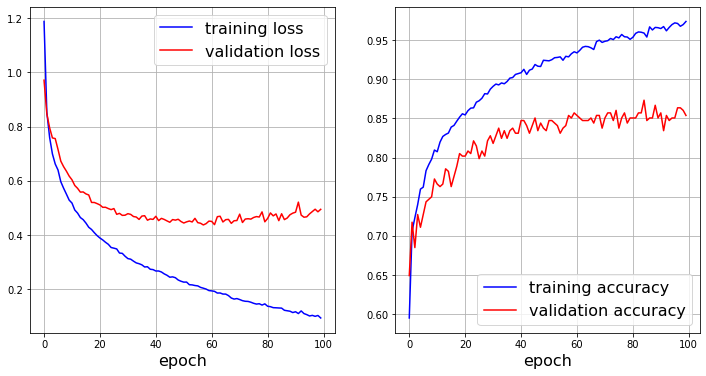

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0,len(loss_train_list)), loss_train_list, '-b', label='training loss')
ax[0].plot(np.arange(0,len(loss_val_list)), loss_val_list, '-r', label='validation loss')
ax[0].set_xlabel('epoch',fontsize=16)
ax[0].legend(fontsize=16)
ax[0].grid(True)
ax[1].plot(np.arange(0,len(acc_train_list)), acc_train_list, '-b', label='training accuracy')
ax[1].plot(np.arange(0,len(acc_val_list)), acc_val_list, '-r', label='validation accuracy')
ax[1].set_xlabel('epoch',fontsize=16)
ax[1].legend(fontsize=16)
ax[1].grid(True)

### Test the model

In [23]:
#load the best model
best_epoch=np.argmax(acc_val_list)
best_epoch

84

In [24]:
import tensorflow
model = tensorflow.keras.models.load_model("ECG_Keras_sCE_e"+str(best_epoch)+".h5")

In [25]:
score = model.evaluate(X_test, Y_test, batch_size=64, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34063011407852173
Test accuracy: 0.8959687948226929


### Make Prediction on the test set

In [19]:
Y_test_pred=model.predict(X_test, batch_size=64)

13/13 [==============================] - 0s 3ms/step


In [20]:
Y_test_pred[0]

array([1.6284249e-03, 9.9831825e-01, 2.1629714e-05, 1.8242091e-06,
       2.9891591e-05], dtype=float32)

In [21]:
np.argmax(Y_test_pred[0])

1

In [22]:
Y_test[0]

1

In [29]:
Y_test_pred=np.argmax(Y_test_pred, axis=1)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       176
           1       0.86      0.85      0.85       154
           2       0.90      0.90      0.90       146
           3       0.89      0.92      0.90       122
           4       0.99      0.93      0.96       171

    accuracy                           0.89       769
   macro avg       0.89      0.89      0.89       769
weighted avg       0.89      0.89      0.89       769

